# Fine Tuning Transfer Learning Models

## 📈 Fine Tune on premade Dataset

### Import the dataset

In [1]:
from datasets import load_dataset
import numpy as np

In [2]:
raw_datasets = load_dataset('glue', 'sst2')

Generating train split:   0%|          | 0/67349 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

#### Visualize the dataset features

In [3]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 67349
    })
    validation: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 872
    })
    test: Dataset({
        features: ['sentence', 'label', 'idx'],
        num_rows: 1821
    })
})

In [4]:
raw_datasets['train']

Dataset({
    features: ['sentence', 'label', 'idx'],
    num_rows: 67349
})

#### Functions that can be called on the datasets object

In [5]:
dir(raw_datasets['train'])

['_TF_DATASET_REFS',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getitems__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_local_temp_path',
 '_check_index_is_initialized',
 '_data',
 '_estimate_nbytes',
 '_fingerprint',
 '_format_columns',
 '_format_kwargs',
 '_format_type',
 '_generate_tables_from_cache_file',
 '_generate_tables_from_shards',
 '_get_cache_file_path',
 '_get_output_signature',
 '_getitem',
 '_indexes',
 '_indices',
 '_info',
 '_map_single',
 '_new_dataset_with_indices',
 '_output_all_columns',
 '_push_parquet_shards_to_hub',
 '_save_to_disk_single',
 '_select_contiguo

In [6]:
type(raw_datasets['train'])

datasets.arrow_dataset.Dataset

#### Visualize dataset data

In [7]:
raw_datasets['train'].data

MemoryMappedTable
sentence: string
label: int64
idx: int32
----
sentence: [["hide new secretions from the parental units ","contains no wit , only labored gags ","that loves its characters and communicates something rather beautiful about human nature ","remains utterly satisfied to remain the same throughout ","on the worst revenge-of-the-nerds clichés the filmmakers could dredge up ",...,"you wish you were at home watching that movie instead of in the theater watching this one ","'s no point in extracting the bare bones of byatt 's plot for purposes of bland hollywood romance ","underdeveloped ","the jokes are flat ","a heartening tale of small victories "],["suspense , intriguing characters and bizarre bank robberies , ","a gritty police thriller with all the dysfunctional family dynamics one could wish for ","with a wonderful ensemble cast of characters that bring the routine day to day struggles of the working class to life ","nonetheless appreciates the art and reveals a music sc

In [8]:
raw_datasets['train'][0]

{'sentence': 'hide new secretions from the parental units ',
 'label': 0,
 'idx': 0}

In [9]:
raw_datasets['train'][5000:5003]

{'sentence': ['entirely stale concept ',
  'will amuse or entertain them ',
  'wobbly premise work '],
 'label': [0, 1, 0],
 'idx': [5000, 5001, 5002]}

In [10]:
raw_datasets['train'].features

{'sentence': Value(dtype='string', id=None),
 'label': ClassLabel(names=['negative', 'positive'], id=None),
 'idx': Value(dtype='int32', id=None)}

### Tokenize the text data

In [11]:
from transformers import AutoTokenizer

checkpoint = 'distilbert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

#### Tokenize a subset of the data to visualize the tokenization

In [12]:
from pprint import pprint

In [13]:
tokenized_sentences = tokenizer(raw_datasets['train'][0:3]['sentence'])
pprint(tokenized_sentences)

{'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
                    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]],
 'input_ids': [[101, 5342, 2047, 3595, 8496, 2013, 1996, 18643, 3197, 102],
               [101,
                3397,
                2053,
                15966,
                1010,
                2069,
                4450,
                2098,
                18201,
                2015,
                102],
               [101,
                2008,
                7459,
                2049,
                3494,
                1998,
                10639,
                2015,
                2242,
                2738,
                3376,
                2055,
                2529,
                3267,
                102]]}


#### Create a tokenization wrapper to quickly tokenize the dataset

In [15]:
def tokenize_fn(batch):
    return tokenizer(batch['sentence'], truncation=True)

In [16]:
tokenized_datasets = raw_datasets.map(tokenize_fn, batched=True)

Map:   0%|          | 0/67349 [00:00<?, ? examples/s]

Map:   0%|          | 0/872 [00:00<?, ? examples/s]

Map:   0%|          | 0/1821 [00:00<?, ? examples/s]

### Create Training Arguments for the Model

In [17]:
from transformers import TrainingArguments

In [18]:
training_args = TrainingArguments(
    'my_trainer',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=1
)

### Import the Model

In [19]:
from transformers import AutoModelForSequenceClassification

In [20]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [21]:
type(model)

transformers.models.distilbert.modeling_distilbert.DistilBertForSequenceClassification

In [24]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

### Setup the Trainer and Metrics

In [25]:
from transformers import Trainer
from datasets import load_metric

In [27]:
metric = load_metric('glue', 'sst2')

#Dummy compute on metric to see what it will look like
metric.compute(predictions = [1,0,1], references=[1,0,0])

/opt/anaconda3/lib/python3.11/site-packages/datasets/load.py:756: FutureWarning: The repository for glue contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.18.0/metrics/glue/glue.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


{'accuracy': 0.6666666666666666}

#### Create a function that will compute our metrics

In [28]:
def compute_metrics(logits_and_labels):
    logits, labels = logits_and_labels
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

#### Build the Trainer

In [29]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/opt/anaconda3/lib/python3.11/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [30]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.199100,0.331456,0.909404


TrainOutput(global_step=8419, training_loss=0.2652225986004499, metrics={'train_runtime': 1010.1819, 'train_samples_per_second': 66.67, 'train_steps_per_second': 8.334, 'total_flos': 517212489917652.0, 'train_loss': 0.2652225986004499, 'epoch': 1.0})

In [31]:
trainer.save_model('my_first_finetuned_model')

### Test out the new fine tuned model

In [33]:
from transformers import pipeline

new_model = pipeline('text-classification', model='my_first_finetuned_model', framework='pt')

In [34]:
new_model('This movie is great!')

[{'label': 'LABEL_1', 'score': 0.9994922876358032}]

In [35]:
new_model('This movie sucks')

[{'label': 'LABEL_0', 'score': 0.9982945322990417}]

#### Handle generic labels by altering the config json file

In [36]:
import json
config_path = 'my_first_finetuned_model/config.json'
with open(config_path) as f:
    j = json.load(f)

j['id2label'] = {0: 'negative', 1: 'positive'}

with open(config_path, 'w') as f:
    json.dump(j, f, indent=2)

In [37]:
new_model = pipeline('text-classification', model='my_first_finetuned_model', framework='pt')

In [38]:
new_model('This movie is great!')

[{'label': 'positive', 'score': 0.9994922876358032}]

## ✍️ Fine-Tuning on Custom Dataset

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

### Import the Data

In [2]:
df = pd.read_csv('data/AirlineTweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
df = df[['airline_sentiment', 'text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

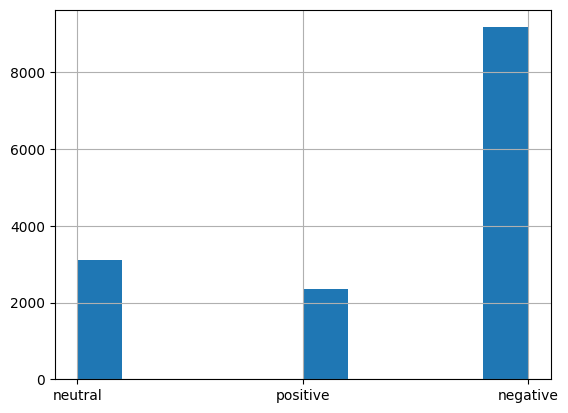

In [4]:
df['airline_sentiment'].hist()

In [5]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


### Create a dataset csv so that we can use the load_dataset method
- **IMPORTANT**: The new dataset's target column MUST be named 'label' to be read in by the load_dataset function

In [6]:
df2 = df[['text', 'target']].copy()
df2.columns = ['sentence', 'label']
df2.to_csv('data/airlinetweetsfixed.csv', index=None)

In [7]:
from datasets import load_dataset
raw_dataset = load_dataset('csv', data_files='data/airlinetweetsfixed.csv')
raw_dataset

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

### Split data into train and test sets

In [8]:
split = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

### Tokenize the Data

In [9]:
from transformers import AutoTokenizer

In [10]:
checkpoint = 'distilbert-base-cased'

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [11]:
def tokenize_fn(batch):
    return tokenizer(batch['sentence'], truncation=True)

In [12]:
tokenized_datasets = split.map(tokenize_fn, batched=True)

Map:   0%|          | 0/10248 [00:00<?, ? examples/s]

Map:   0%|          | 0/4392 [00:00<?, ? examples/s]

### Import the model

In [13]:
from transformers import AutoModelForSequenceClassification

In [14]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=3)
model

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

### Set up the Training Arguments and the Trainer

In [15]:
from transformers import TrainingArguments, Trainer

In [16]:
training_args = TrainingArguments(
    output_dir='training_dir',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64
)

#### We build the compute metrics function because we know what it should return, a dictionary 

In [17]:
def compute_metrics(logits_and_labels):
    logits, labels = logits_and_labels
    predictions = np.argmax(logits, axis=-1)
    acc = np.mean(predictions == labels)
    return {'accuracy': acc}

In [18]:
trainer = Trainer(
    model,
    training_args,
    train_dataset= tokenized_datasets['train'],
    eval_dataset= tokenized_datasets['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/opt/anaconda3/lib/python3.11/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


### Train the model

In [19]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.549500,0.469124,0.824909
2,0.347900,0.502661,0.833789
3,0.246900,0.614516,0.835155


TrainOutput(global_step=1923, training_loss=0.3324418328295632, metrics={'train_runtime': 363.8584, 'train_samples_per_second': 84.494, 'train_steps_per_second': 5.285, 'total_flos': 388537948763424.0, 'train_loss': 0.3324418328295632, 'epoch': 3.0})

#### By the 3rd epoch our model was massively overfitting, so we will use the model from epoch 2

In [21]:
!ls training_dir

checkpoint-1282 checkpoint-1923 checkpoint-641  runs


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


checkpoint-1282 is the 2nd hightest training step so that is our 2nd epoch

### Test our new model

In [22]:
from transformers import pipeline

In [23]:
new_model = pipeline('text-classification',model='training_dir/checkpoint-1282/', framework='pt')

In [24]:
test_pred = new_model(split['test']['sentence'])
test_pred

[{'label': 'LABEL_1', 'score': 0.9024790525436401},
 {'label': 'LABEL_1', 'score': 0.9323650002479553},
 {'label': 'LABEL_2', 'score': 0.5682129859924316},
 {'label': 'LABEL_1', 'score': 0.8090113401412964},
 {'label': 'LABEL_2', 'score': 0.39973485469818115},
 {'label': 'LABEL_0', 'score': 0.9969663023948669},
 {'label': 'LABEL_2', 'score': 0.8045974969863892},
 {'label': 'LABEL_2', 'score': 0.5792801380157471},
 {'label': 'LABEL_1', 'score': 0.7784878015518188},
 {'label': 'LABEL_0', 'score': 0.9974740147590637},
 {'label': 'LABEL_0', 'score': 0.9697872400283813},
 {'label': 'LABEL_0', 'score': 0.9961252808570862},
 {'label': 'LABEL_1', 'score': 0.9665440917015076},
 {'label': 'LABEL_0', 'score': 0.9943262934684753},
 {'label': 'LABEL_2', 'score': 0.9701145887374878},
 {'label': 'LABEL_2', 'score': 0.5021890997886658},
 {'label': 'LABEL_0', 'score': 0.47092682123184204},
 {'label': 'LABEL_0', 'score': 0.997565507888794},
 {'label': 'LABEL_0', 'score': 0.9169389009475708},
 {'label': 

#### Set up our labels correctly

In [25]:
def get_label(d):
    return int(d['label'].split('_')[1])

test_pred = [get_label(d) for d in test_pred]

In [27]:
print(f"Accuracy: {round(accuracy_score(split['test']['label'], test_pred) * 100, 2)}%")

Accuracy: 83.38%


In [28]:
print(classification_report(split['test']['label'], test_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      2811
           1       0.76      0.79      0.77       664
           2       0.73      0.58      0.65       917

    accuracy                           0.83      4392
   macro avg       0.79      0.77      0.77      4392
weighted avg       0.83      0.83      0.83      4392



## ✌️ Create a Binary Predictor to Compare to our Pretrained Model from our earlier notebook

### Load and set up data

In [29]:
df = pd.read_csv('data/airlinetweetsfixed.csv')
df.head()

,sentence,label
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [30]:
df = df[df['label'] != 2]
df.head()

,sentence,label
1,@VirginAmerica plus you've added commercials t...,1
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0
5,@VirginAmerica seriously would pay $30 a fligh...,0
6,"@VirginAmerica yes, nearly every time I fly VX...",1


In [33]:
df.to_csv('data/airlinetweetnoneutral.csv', index=None)

### Create dataset for transformer

In [35]:
raw_dataset = load_dataset('csv', data_files='data/airlinetweetnoneutral.csv')
raw_dataset

Generating train split: 0 examples [00:00, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 11541
    })
})

In [36]:
split = raw_dataset['train'].train_test_split(test_size=0.3, seed=42)
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 8078
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 3463
    })
})

### Setup the tokenizer

In [37]:
checkpoint = 'distilbert-base-cased'

tokenizer = AutoTokenizer.from_pretrained(checkpoint)

In [38]:
tokenized_datasets = split.map(tokenize_fn, batch_size=True)
tokenized_datasets

Map:   0%|          | 0/8078 [00:00<?, ? examples/s]

Map:   0%|          | 0/3463 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 8078
    })
    test: Dataset({
        features: ['sentence', 'label', 'input_ids', 'attention_mask'],
        num_rows: 3463
    })
})

### Import the model

In [40]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 2)
model

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(28996, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

### Set up the Training Arguments and the Trainer

In [41]:
training_args = TrainingArguments(
    output_dir='binary_training_dir',
    evaluation_strategy='epoch',
    save_strategy='epoch',
    per_device_train_batch_size=16,
    per_device_eval_batch_size=64
)

In [42]:
trainer = Trainer(
    model,
    training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/opt/anaconda3/lib/python3.11/site-packages/accelerate/accelerator.py:432: FutureWarning: Passing the following arguments to `Accelerator` is deprecated and will be removed in version 1.0 of Accelerate: dict_keys(['dispatch_batches', 'split_batches', 'even_batches', 'use_seedable_sampler']). Please pass an `accelerate.DataLoaderConfiguration` instead: 
dataloader_config = DataLoaderConfiguration(dispatch_batches=None, split_batches=False, even_batches=True, use_seedable_sampler=True)
  warnings.warn(


In [43]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.232000,0.192789,0.928097
2,0.107800,0.232629,0.930407
3,0.043100,0.286246,0.937338


TrainOutput(global_step=1515, training_loss=0.1269912044207255, metrics={'train_runtime': 275.0122, 'train_samples_per_second': 88.12, 'train_steps_per_second': 5.509, 'total_flos': 303120594777696.0, 'train_loss': 0.1269912044207255, 'epoch': 3.0})

In [45]:
model = pipeline('text-classification', model='binary_training_dir/checkpoint-1010', framework='pt')

test_pred = model(split['test']['sentence'])
test_pred = [get_label(d) for d in test_pred]

In [46]:
print(f"Accuracy: {round(accuracy_score(split['test']['label'], test_pred) * 100, 2)}%")

Accuracy: 93.04%


In [47]:
print(classification_report(split['test']['label'], test_pred))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2790
           1       0.79      0.88      0.83       673

    accuracy                           0.93      3463
   macro avg       0.88      0.91      0.89      3463
weighted avg       0.93      0.93      0.93      3463



By fine tuning we increased our model accuracy from 89% to 93%